In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_libsvm(fname):
    with open(fname) as f:
        x,y  =list(),list()
        for l in f:
            line = l.strip().split(" ")
            y.append(int(line[0]))
            x.append([float(s.split(":")[1]) for s in line[1:]])
    return np.array(x),np.array(y)

In [3]:
class Loss:
    def forward(self, yPred, y):
        pass

    def backward(self, yPred, y):
        pass

In [4]:
class Module:
    def forward(self, x):
        pass

    def backward(self, x, delta):
        pass

    def update(self):
        pass

In [39]:
def gradSto(m, l, x, y, n = 10000, minErr = 0):
    ''' x in size N*arg'''
    for i in range(n):
        j = np.random.randint(0,len(x))
        yPred = m.forward(x[j])
        err = l.forward(yPred, y[j])
        theta = l.backward(yPred, y[j])
        m.backward(x[j], theta)
        if (err <= minErr):
            break

In [10]:
class SquareLoss:
    def forward(self, yPred, y):
        return np.mean((yPred - y) * (yPred - y))

    def backward(self, yPred, y):
        return 2 * yPred - 2 * y

In [72]:
class Linear:
    def __init__(self, e = 0.1):
        self.ini = False
        self.eps = e
    
    def init(self, x):
        self.param = np.random.random(x.shape[1]+1)
        self.grad = np.zeros((1,x.shape[1]+1))
        self.ini = True

    def forward(self, x):
        if x.ndim < 2:
            x = x.reshape((1,-1))
        if self.ini == False :
            self.init(x)
        return np.sum(np.concatenate((np.ones((x.shape[0],1)), x), axis = 1) * self.param, 1)
    
    def backward(self, x, theta):
        if x.ndim < 2:
            x = x.reshape((1,-1))
        g = theta * np.concatenate((np.ones((x.shape[0],1)), x), axis = 1)
        self.grad = np.concatenate((self.grad, g))
        self.param = self.param - self.eps * g

In [73]:
m = Linear()
l = SquareLoss()
x,y = read_libsvm("./breast-cancer_scale")
gradSto(m,l,x,y)

In [94]:
class Perceptron(Linear):
    def forward(self, x):
        r = Linear.forward(self, x)
        r[r>=0] = 1
        r[r<0] = -1
        return r

In [95]:
m = Perceptron()
l = SquareLoss()
x,y = read_libsvm("./breast-cancer_scale")
y[y == 2] = -1
y[y == 4] = 1
gradSto(m,l,x,y)

In [96]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [115]:
x,y = unison_shuffled_copies(x, y)
trainx = x[:int(x.shape[0]*0.8)]
trainy = y[:int(y.shape[0]*0.8)]
testx = x[int(x.shape[0]*0.2):]
testy = y[int(y.shape[0]*0.2):]

In [143]:
def gradStoAff(m, l, tx, ty, tex, tey, n = 100):
    ''' x in size N*arg'''
    errt = []
    errte = []
    for i in range(n):
        j = np.random.randint(0,len(tx))
        yPred = m.forward(tx[j])
        errt.append(l.forward(m.forward(tx), ty))
        errte.append(l.forward(m.forward(tex), tey))
        theta = l.backward(yPred, ty[j])
        m.backward(tx[j], theta)
    return errt, errte

In [144]:
m = Perceptron()
l = SquareLoss()
errt, errte = gradStoAff(m,l,trainx,trainy, testx, testy)

In [145]:
from matplotlib import pyplot as plt

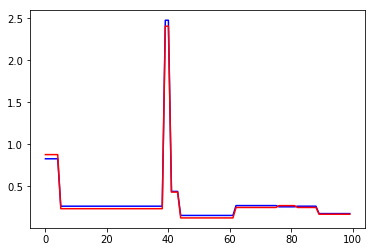

In [146]:
plt.plot(errt, 'b')
plt.plot(errte, 'r')
plt.show()